# Movie Data Analysis

This Jupyter Notebook performs a comprehensive analysis of movie data fetched from the TMDB API. It uses 

functions defined in `tmdb_functions.py` to fetch, clean, and analyze data, calculate KPIs, perform advanced 

filtering, compare franchises vs. standalone movies, analyze franchises and directors, and generate 

visualizations.


In [ ]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt




In [ ]:
# Import functions from tmdb_functions.py
from tmdb_functions import (
    get_api_key,                     # Function to retrieve the API key
    fetch_movie_data,               # Function to fetch movie data from TMDB API
    save_df,                        # Function to save dataframe to file
    load_df,                        # Function to load dataframe from file
    clean_df,                       # Function to clean the dataframe
    kpi_ranking,                    # Function to calculate key performance indicators
    advanced_search,                # Function to perform advanced movie filtering
    franchise_vs_standalone,        # Function to compare franchise and standalone movies
    analyze_franchise,              # Function to analyze franchise performance
    analyze_directors,              # Function to evaluate director performance
    plot_revenue_vs_budget,         # Function to plot revenue vs. budget
    plot_roi_by_genre,              # Function to visualize ROI by genre
    plot_popularity_vs_rating,      # Function to plot popularity vs. rating
    plot_yearly_box_office,         # Function to show trends over years
    plot_franchise_vs_standalone    # Function to compare franchises vs standalone movies graphically
)


## Fetching and Saving Raw Movie Data

- **Get API key:** Retrieves the TMDB API key from environment variables using `get_api_key()`.

- **Define movie IDs:** Creates a list of specific TMDB movie IDs to analyze.

- **Fetch data:** Uses the custom function `fetch_movie_data()` to collect metadata for each movie.

- **Save to CSV:** Saves the raw movie data into a file called `raw_movie_data_new.csv`.

- **Preview data:** Displays the first few records of the fetched raw data using `.head()`.


In [11]:
# Get API
get_api_key()

# Define movie IDs and fetch data
movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397,
             420818, 24428, 168259, 99861, 284054, 12445,
             181808, 330457, 351286, 109445, 321612, 260513]

# Fetch movie data
raw_data = fetch_movie_data(movie_ids)

# Save raw data to CSV
save_df(raw_data, 'raw_movie_data_new.csv')

# Display first few rows
raw_data.head()

INFO:root:Saved to raw_movie_data_new.csv


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,[US],en,...,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.237,26240,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,...,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.588,32153,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,[US],en,...,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.261,19686,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,[US],en,...,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.235,30420,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.paramountmovies.com/movies/titanic,597,tt0120338,[US],en,...,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,False,7.905,25902,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


## 🧹 Cleaning the Movie Dataset

- **Clean raw data:** Applies `clean_df()` to standardize column names, fix formatting issues, and convert data types.
- **Replace 'No Data':** Converts placeholder strings like "No Data" in the 'overview' and 'tagline' columns to missing values (`pd.NA`).
- **Remove duplicates and missing values:** Drops duplicates and any rows that do not contain valid `id` or `title`.
- **Drop sparse rows:** Removes rows with fewer than 10 non-null entries.
- **Filter for released movies only:** Keeps only movies with a status of `'Released'`, then removes the status column.
- **Save cleaned data:** Exports the cleaned dataset as `cleaned_movie_data.csv`.
- **Preview cleaned data:** Displays the first few records of the cleaned dataset.


In [12]:
# Clean the data
cleaned_data = clean_df(raw_data)

# Additional cleaning steps
cleaned_data['overview'] = cleaned_data['overview'].replace('No Data', pd.NA)
cleaned_data['tagline'] = cleaned_data['tagline'].replace('No Data', pd.NA)
cleaned_data = cleaned_data.drop_duplicates().dropna(subset=['id', 'title'])
cleaned_data = cleaned_data.dropna(thresh=10)
if 'status' in cleaned_data:
    cleaned_data = cleaned_data[cleaned_data['status'] == 'Released']
    cleaned_data = cleaned_data.drop(columns=['status'])

# Save cleaned data to CSV
save_df(cleaned_data, 'cleaned_movie_data.csv')

# Display first few rows
cleaned_data.head()

INFO:root:Saved to cleaned_movie_data.csv


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_millions,revenue_millions,production_companies,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size,profit,roi
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Action|Adventure|Science Fiction,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,181,After the devastating events of Avengers: Infi...,English|日本語|,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Joe Russo|Anthony Russo,593,2443.439100,7.863593
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986,2686.706026,12.336312
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Action|Adventure|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257,1823.223624,8.441729
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Action|Adventure|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,149,As the Avengers and their allies have continue...,English|,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo|Anthony Russo,724,1752.415039,6.841383
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance,<NA>,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258,2064.162353,11.320812


## Ranking Movies by Key Metrics

This section ranks movies based on various performance indicators using the `kpi_ranking()` function:

- **Top by Revenue:** Shows the 5 movies with the highest revenue.
- **Top by Budget:** Displays the top 5 movies with the highest production budgets.
- **Top by Profit:** Ranks movies by the difference between revenue and budget.
- **Bottom by Profit:** Shows the 5 least profitable movies.
- **Top ROI:** Displays top 5 movies with highest Return on Investment (ROI), filtering out movies with budget < 10M.
- **Bottom ROI:** Shows the worst-performing 5 movies by ROI (budget ≥ 10M).
- **Most Voted:** Lists movies with the highest number of audience votes.
- **Highest Rated:** Displays the best-rated movies (only those with at least 10 votes).
- **Lowest Rated:** Displays the lowest-rated movies (with ≥ 10 votes).
- **Most Popular:** Shows the most popular movies based on TMDB's popularity score.


In [13]:
# Calculate KPIs
print("Top 5 Movies by Revenue:")
print(kpi_ranking(cleaned_data, 'revenue_millions', n=5)[['title', 'revenue_millions']])

print("\nTop 5 Movies by Budget:")
print(kpi_ranking(cleaned_data, 'budget_millions', n=5)[['title', 'budget_millions']])

print("\nTop 5 Movies by Profit:")
print(kpi_ranking(cleaned_data, 'profit', n=5)[['title', 'profit']])

print("\nBottom 5 Movies by Profit:")
print(kpi_ranking(cleaned_data, 'profit', n=5, top=False)[['title', 'profit']])

print("\nTop 5 Movies by ROI (Budget >= 10M):")
print(kpi_ranking(cleaned_data, 'roi', n=5, filter_col='budget_millions', filter_val=10)[['title', 'roi']])

print("\nBottom 5 Movies by ROI (Budget >= 10M):")
print(kpi_ranking(cleaned_data, 'roi', n=5, top=False, filter_col='budget_millions', filter_val=10)[['title', 'roi']])

print("\nMost Voted Movies:")
print(kpi_ranking(cleaned_data, 'vote_count', n=5)[['title', 'vote_count']])

print("\nHighest Rated Movies (>= 10 votes):")
print(kpi_ranking(cleaned_data, 'vote_average', n=5, filter_col='vote_count', filter_val=10)[['title', 'vote_average']])

print("\nLowest Rated Movies (>= 10 votes):")
print(kpi_ranking(cleaned_data, 'vote_average', n=5, top=False, filter_col='vote_count', filter_val=10)[['title', 'vote_average']])

print("\nMost Popular Movies:")
print(kpi_ranking(cleaned_data, 'popularity', n=5)[['title', 'popularity']])

Top 5 Movies by Revenue:
                          title  revenue_millions
1                        Avatar       2923.706026
0             Avengers: Endgame       2799.439100
4                       Titanic       2264.162353
2  Star Wars: The Force Awakens       2068.223624
3        Avengers: Infinity War       2052.415039

Top 5 Movies by Budget:
                          title  budget_millions
9       Avengers: Age of Ultron            365.0
0             Avengers: Endgame            356.0
3        Avengers: Infinity War            300.0
6                 The Lion King            260.0
2  Star Wars: The Force Awakens            245.0

Top 5 Movies by Profit:
                          title       profit
1                        Avatar  2686.706026
0             Avengers: Endgame  2443.439100
4                       Titanic  2064.162353
2  Star Wars: The Force Awakens  1823.223624
3        Avengers: Infinity War  1752.415039

Bottom 5 Movies by Profit:
                       title     

## Advanced Search for Specific Movies

This section filters movies based on custom conditions using the `advanced_search()` function:

- **Search 1:** Retrieves Science Fiction + Action movies starring Bruce Willis, sorted by rating.

- **Search 2:** Finds movies featuring Uma Thurman and directed by Quentin Tarantino, sorted by runtime.


In [14]:
# Advanced filtering
# Search 1: Best-rated Science Fiction Action movies starring Bruce Willis
sci_fi_action_willis = advanced_search(
    cleaned_data,
    genre_keywords='Science Fiction|Action',
    cast_keywords='Bruce Willis',
    sort_by='vote_average',
    ascending=False
)
print("Science Fiction Action Movies Starring Bruce Willis (Sorted by Rating):")
print(sci_fi_action_willis[['title', 'genres', 'cast', 'vote_average']])

# Search 2: Movies starring Uma Thurman, directed by Quentin Tarantino
thurman_tarantino = advanced_search(
    cleaned_data,
    cast_keywords='Uma Thurman',
    director_keywords='Quentin Tarantino',
    sort_by='runtime',
    ascending=True
)
print("\nMovies Starring Uma Thurman Directed by Quentin Tarantino (Sorted by Runtime):")
print(thurman_tarantino[['title', 'cast', 'director', 'runtime']])

Science Fiction Action Movies Starring Bruce Willis (Sorted by Rating):
Empty DataFrame
Columns: [title, genres, cast, vote_average]
Index: []

Movies Starring Uma Thurman Directed by Quentin Tarantino (Sorted by Runtime):
Empty DataFrame
Columns: [title, cast, director, runtime]
Index: []


## Franchise vs. Standalone Movie Analysis

- **Compare performance:** Uses `franchise_vs_standalone()` to compare the average performance of movie franchises versus standalone films.

- **Output includes:** metrics like average revenue, budget, profit, and rating.


In [15]:
# Franchise vs. standalone comparison
franchise_comparison = franchise_vs_standalone(cleaned_data)
print("Franchise vs. Standalone Comparison:")
print(franchise_comparison)

Franchise vs. Standalone Comparison:
        Group  Mean Revenue  Mean ROI  Mean Budget Raised  Mean Popularity  \
0   Franchise   1682.641971  8.000174             219.875        26.128694   
1  Standalone   1765.139159  9.617018             180.000        39.571900   

   Mean Rating  
0      7.37975  
1      7.43800  


## Top Performing Movie Franchises

- **Analyze franchises:** Uses `analyze_franchise()` to group movies by franchise and calculate performance metrics.

- **Sort by total revenue:** Ranks the franchises from highest to lowest by total revenue.


In [16]:
# Analyze franchises
franchise_stats = analyze_franchise(cleaned_data, sort_by='total_revenue_millions', ascending=False)
print("Most Successful Franchises (Sorted by Total Revenue):")
print(franchise_stats)

Most Successful Franchises (Sorted by Total Revenue):
                                     total_movies  total_budget_millions  \
belongs_to_collection                                                      
The Avengers Collection                         4                 1241.0   
Star Wars Collection                            2                  445.0   
Jurassic Park Collection                        2                  320.0   
Avatar Collection                               1                  237.0   
Frozen Collection                               2                  300.0   
The Lion King (Reboot) Collection               1                  260.0   
The Fast and the Furious Collection             1                  190.0   
Black Panther Collection                        1                  200.0   
Harry Potter Collection                         1                  125.0   
The Incredibles Collection                      1                  200.0   

                                 

## Most Successful Directors

- **Analyze directors:** Groups movies by director and calculates total revenue and average performance.

- **Sort by total revenue:** Highlights top directors based on the combined earnings of their movies.


In [17]:
# Analyze directors
director_stats = analyze_directors(cleaned_data, sort_by='total_revenue_millions', ascending=False)
print("Most Successful Directors (Sorted by Total Revenue):")
print(director_stats)

Most Successful Directors (Sorted by Total Revenue):
                         total_movies_directed  total_revenue_millions  \
director                                                                 
Joe Russo|Anthony Russo                      2             4851.854139   
Joss Whedon                                  2             2924.219209   
James Cameron                                1             2923.706026   
J.J. Abrams                                  1             2068.223624   
Colin Trevorrow                              1             1671.537444   
Jon Favreau                                  1             1662.020819   
James Wan                                    1             1515.400000   
Jennifer Lee|Chris Buck                      1             1453.683476   
Ryan Coogler                                 1             1349.926083   
David Yates                                  1             1341.511219   
Rian Johnson                                 1             

## Generating and Saving Key Movie Visualizations

1. **Revenue vs. Budget**  
   - `plot_revenue_vs_budget(cleaned_data)`  
   - Visualizes the relationship between a movie's production budget and its revenue.
   - Helps assess how effectively budgets translate into earnings.

2. **ROI by Genre**  
   - `plot_roi_by_genre(cleaned_data)`  
   - Shows the average Return on Investment (ROI) for each movie genre.
   - Useful for identifying genres that are more financially efficient.

3. **Popularity vs. Rating**  
   - `plot_popularity_vs_rating(cleaned_data)`  
   - Compares TMDB popularity scores with user ratings.
   - Reveals whether highly rated movies are also the most popular.

4. **Yearly Box Office Trends**  
   - `plot_yearly_box_office(cleaned_data)`  
   - Illustrates total revenue generated by movies per year.
   - Provides insight into box office growth or decline over time.

5. **Franchise vs. Standalone Movies**  
   - `plot_franchise_vs_standalone(cleaned_data)`  
   - Compares performance metrics (e.g., revenue, rating) between franchise and standalone films.
   - Highlights the value of sequels and shared universes.



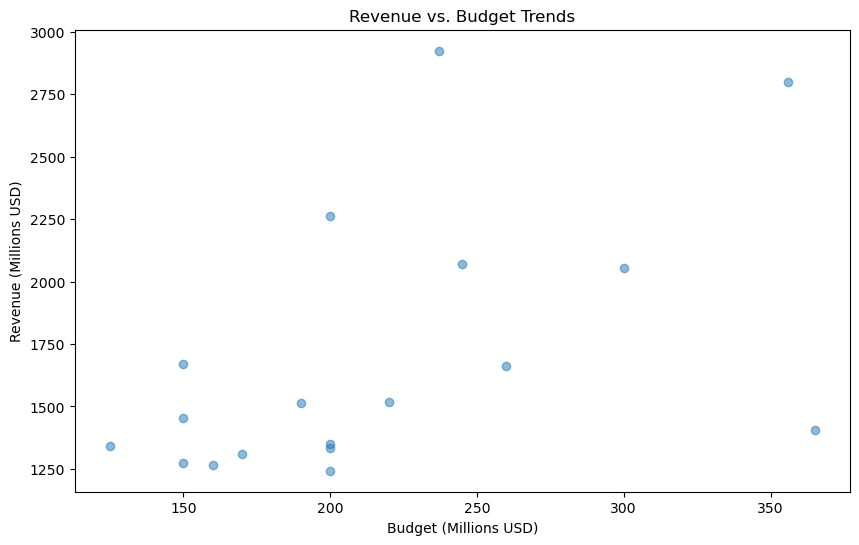

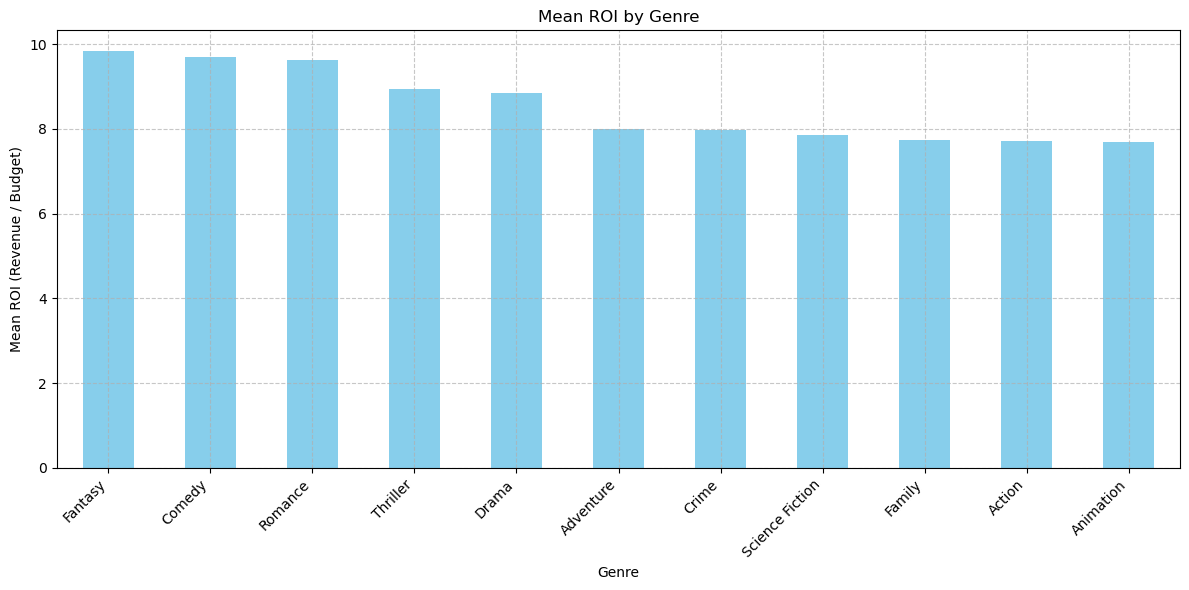

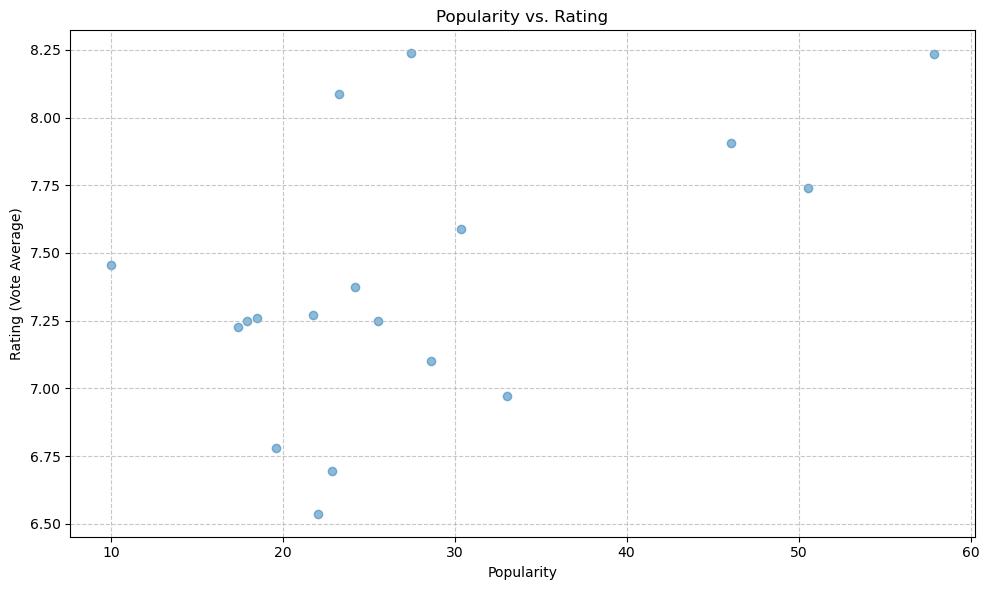

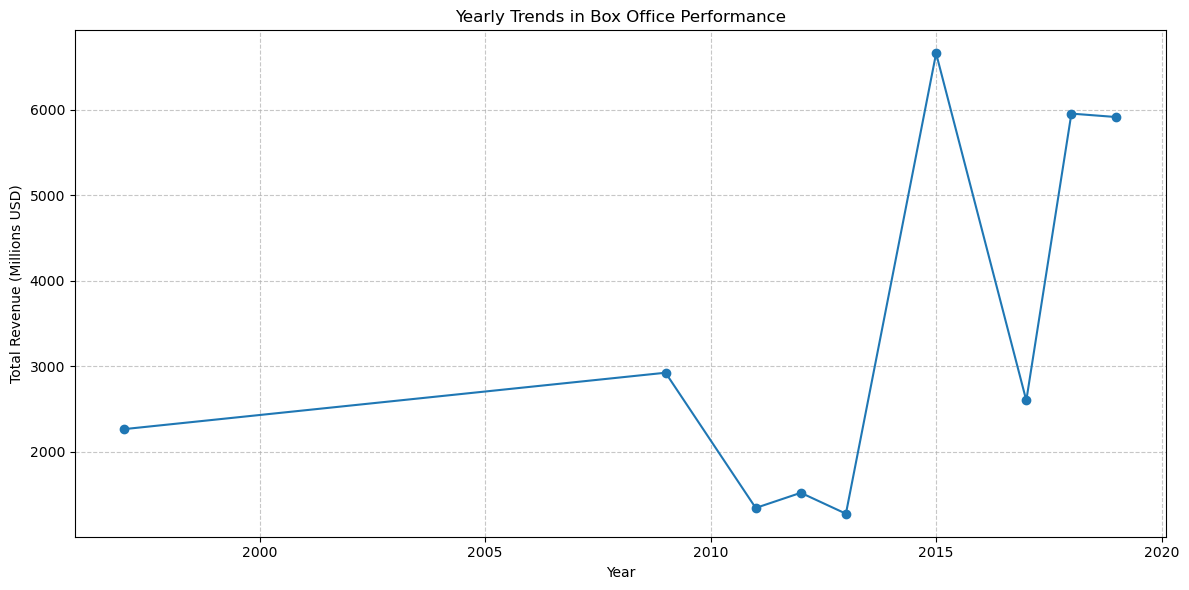

<Figure size 1000x600 with 0 Axes>

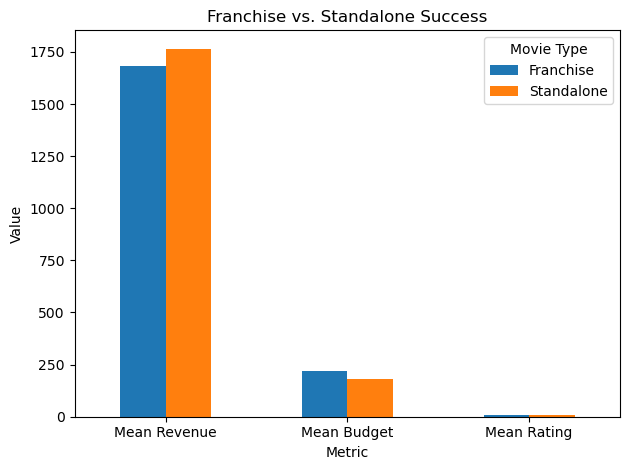

Visualizations saved as PNG files:
- revenue_vs_budget.png
- roi_by_genre.png
- popularity_vs_rating.png
- yearly_box_office.png
- franchise_vs_standalone.png


In [18]:
# Generate visualizations
plot_revenue_vs_budget(cleaned_data)
plt.savefig('revenue_vs_budget.png')
plt.show()

plot_roi_by_genre(cleaned_data)
plt.savefig('roi_by_genre.png')
plt.show()

plot_popularity_vs_rating(cleaned_data)
plt.savefig('popularity_vs_rating.png')
plt.show()

plot_yearly_box_office(cleaned_data)
plt.savefig('yearly_box_office.png')
plt.show()

plot_franchise_vs_standalone(cleaned_data)
plt.savefig('franchise_vs_standalone.png')
plt.show()

print("Visualizations saved as PNG files:")
print("- revenue_vs_budget.png")
print("- roi_by_genre.png")
print("- popularity_vs_rating.png")
print("- yearly_box_office.png")
print("- franchise_vs_standalone.png")

## Final Report

### Key Insights
- **Revenue and Profit Leaders**: [Summarize based on KPI results, e.g., top movies by revenue/profit]
- **Franchise Performance**: [Summarize franchise vs. standalone results, e.g., franchises have higher mean revenue]
- **Genre ROI**: [Highlight genres with highest/lowest ROI based on plots]
- **Director Success**: [Highlight top directors by revenue/rating]

### Methodology
- **Data Source**: Fetched from TMDB API for specified movie IDs.
- **Cleaning**: Handled JSON columns, converted units to millions USD, calculated profit and ROI, removed duplicates.
- **Analysis**: Used custom functions for KPIs, filtering, franchise/directors analysis.
- **Visualizations**: Generated using Matplotlib, saved as PNG files.

### Conclusions
- [Add conclusions based on your analysis, e.g., franchises outperform standalone movies in revenue]
- [Suggest potential next steps, e.g., analyze more movies or additional metrics]